# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# Define the filenames for the training,validation and testing data respectively.

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# define the different datesets    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape)

(34799, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas


In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = X_train.shape[0] 

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print('Number of validation examples =', n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

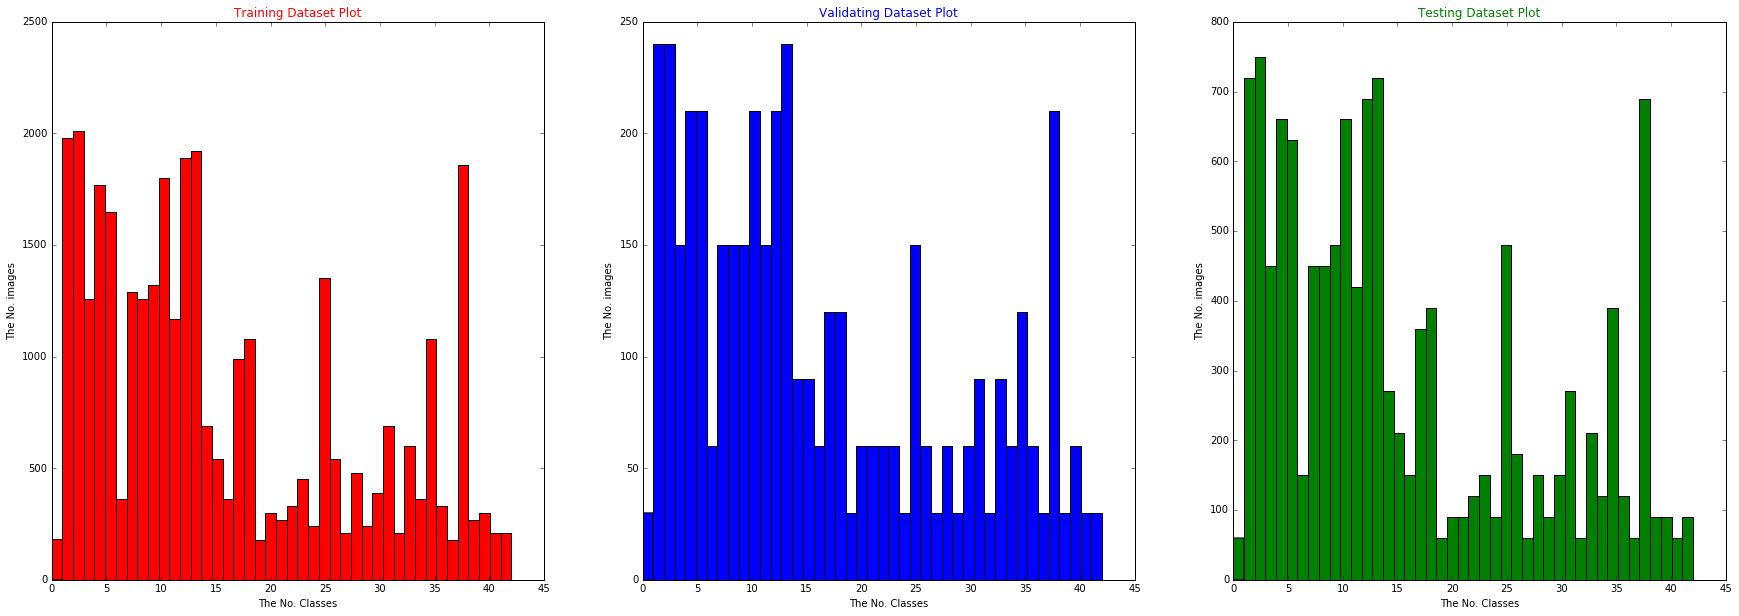

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot the training,validation and testing dataset for visualization 
plt.figure(figsize=(30,10))

ax1 = plt.subplot(131)
ax1.set_title('Training Dataset Plot',color='r')
ax1.set_xlabel('The No. Classes')
ax1.set_ylabel('The No. images')
plt.hist(y_train,43,color='r')

ax2 = plt.subplot(132)
ax2.set_title('Validating Dataset Plot',color='b')
ax2.set_xlabel('The No. Classes')
ax2.set_ylabel('The No. images')
plt.hist(y_valid,43)

ax3 = plt.subplot(133)
ax3.set_title('Testing Dataset Plot',color='g')
ax3.set_xlabel('The No. Classes')
ax3.set_ylabel('The No. images')
plt.hist(y_test,43,color='g')

plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Mean value for the Preprocessed value image -0.354081335648
Mean value for the Original image 43.8818359375
Mean value for the Preprocessed gray image 82.677589037
(34799, 32, 32, 1)
(34799, 32, 32, 1)
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41]


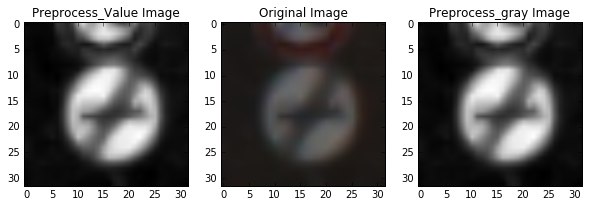

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# Define the function where we normalize the images with (pixel-128)/128
def preprocess_value(images):
    imgs = (images - 128) /128
    return imgs

# Define the color to gray image function
def preprocess_gray(images):
    #print(images.shape)
    #img = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    imgs = np.sum(images/3,axis=3,keepdims=True)
    #print(imgs.shape)
    return imgs

# Visualize the preprocessed and original images

pre_train_gray = preprocess_gray(X_train)
pre_valid_gray = preprocess_gray(X_valid)
pre_train_value= preprocess_value(pre_train_gray)
pre_valid_value = preprocess_value(pre_valid_gray)

fig,axes= plt.subplots(1,3,figsize = (10,10))
axes = axes.ravel()
axes[0].set_title('Preprocess_Value Image')
axes[0].imshow(pre_train_value[0].squeeze(),cmap='gray')

axes[1].set_title('Original Image')
axes[1].imshow(X_train[0])

axes[2].set_title('Preprocess_gray Image')
axes[2].imshow(pre_train_gray[0].squeeze(),cmap='gray')
print('Mean value for the Preprocessed value image',np.mean(pre_train_value))
print('Mean value for the Original image',np.mean(X_train[0]))
print('Mean value for the Preprocessed gray image',np.mean(pre_train_gray))
print(pre_train_value.shape)
print(pre_train_gray.shape)
    
# exploration on the labels
print(y_train[0:100]) # Where the result shows we need to shuffle the training dataset.

# Shuffle the training dataset


# print(y_train[0:100]) to measure the shuffle effection

### Model Architecture

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Define the Deep Learning Architecture based on the LeNet

# Global variables
epoches = 50
batch_size = 100

def LeNet(inputs):
    """LeNet Architecture is descriped like following:
    1. ConvNet:kernel(5,5,input,6) stride(1,1,1,1) padding = 'valid'
    2. Maxpool:kernel(1,2,2,1) stride(1,2,2,1) padding = 'valid'
    3. ConvNet:kernel(5,5,6,16) stride(1,1,1,1) padding='valid'
    4. Maxpool:kernel(1,2,2,1) stride(1,2,2,1) padding='valid'
    5. ConvNet:kernel(5,5,16,400) stride(1,1,1,1) padding='valid'
    6. Flatten layer(4.Maxpool + 5.ConvNet)
    7. Concatenate connected layer(800)
    8. Dropout layer
    9. Fully connected layer(800,43)
    """
    mu = 0
    sigma = 0.1
    # First ConvNet input = (None,32,32,3) output(None,28,28,6)
    w1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma),name='w1')
    x = tf.nn.conv2d(inputs,w1,strides=[1,1,1,1],padding='VALID')# no padding used
    b1 = tf.Variable(tf.zeros(6),name='b1')
    x = tf.nn.bias_add(x,b1)
    #print('ConvNet 1 output shape',x.get_shape())
    
    # Activation function, here we're using relu
    x = tf.nn.relu(x)
    # First Maxpooling layer input=(28,28,6) output=(14,14,6)
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    #print('Maxpool 1 output shape',x.get_shape())
    layer1 = x
    
    # Second convnet input=(14,14,6) output=(10,10,16)
    w2 = tf.Variable(tf.truncated_normal((5,5,6,16),mean=mu,stddev=sigma),name='w2')
    x = tf.nn.conv2d(layer1,w2,strides=[1,1,1,1],padding='VALID')
    b2 = tf.Variable(tf.zeros(16),name='b2')
    x = tf.nn.bias_add(x,b2)
    #print('ConvNet 2 output shape:',x.get_shape)
    
    x = tf.nn.relu(x)
    
    # Second maxpool input=(10,10,16) output=(5,5,16)
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    #print('maxpool 2 output shape:',x.get_shape)
    layer2 = x
    
    # Third ConvNet input = (5,5,16) output = (1,1,400)
    w3 = tf.Variable(tf.truncated_normal((5,5,16,400),mean=mu,stddev=sigma),name='w3')
    x = tf.nn.conv2d(layer2,w3,strides=[1,1,1,1],padding='VALID')
    b3 = tf.Variable(tf.zeros(400),name='b3')
    x = tf.nn.bias_add(x,b3)
    
    x = tf.nn.relu(x)
    layer3 = x
    
    # Flatten layer for the sceond convnet, input=(5,5,16) output=(400,)
    layer2flat = flatten(layer2)
    
    # Flatten layer for the third convnet, input=(1,1,400) output=(400,)
    layer3flat = flatten(layer3)
    
    x = tf.concat([layer2flat,layer3flat],1)
    #print('Flatten layer output shape:',x.get_shape())
    
    x = tf.nn.dropout(x,keep_prob)
    
    # The fully connected layer input=(800,) output =(43)
    w4 = tf.Variable(tf.truncated_normal(shape = (800,43),mean=mu,stddev=sigma),name='w4')
    b4 = tf.Variable(tf.zeros(43),name='b4')
    logits = tf.add(tf.matmul(x,w4),b4)
    
    return logits
    
print('LeNet Done! Luke')
    

LeNet Done! Luke


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
# The placeholders for different variables
x = tf.placeholder(tf.float32,shape=(None,32,32,1))
y = tf.placeholder(tf.int32,shape=(None))
keep_prob = tf.placeholder(tf.float32) # The dropout layer's probability for keeping the weight
one_hot_y = tf.one_hot(y,43)


#print(x.get_shape)
# training model building
learning_rate = 0.0008 # learn rate for backpropagation
#pre_x = preprocess_value(x)
#prex = preprocess_value(x)
#print(prex.shape)
logits = LeNet(x)
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = one_hot_y))
    tf.summary.scalar('loss',loss)
with tf.name_scope('trainng'):
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss)

# Evaluating model building
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    tf.summary.scalar('accuracy',accuracy_operation)
    
#tf.add_to_collection('accuracy_op',accuracy_operation)    
# merge all the summary
summary_merge = tf.summary.merge_all()

# Evaluate the validation data for this dataset
def evaluate(x_data,y_data):
    total_accuracy = 0
    sess = tf.get_default_session()
    for i in range(0,len(x_data),batch_size):
        batch_x,batch_y = x_data[i:batch_size+i],y_data[i:batch_size+i]
        accuracy = sess.run(accuracy_operation,feed_dict={x: batch_x,y:batch_y,keep_prob:1.0})
        total_accuracy += accuracy * len(batch_x)
    return total_accuracy / len(x_data)
#tf.add_to_collection('evaluate_op',evaluate)
print ('Training starts!')
print ('-----------------')
from sklearn.utils import shuffle

# Define a saver for saving the model and hyperparameters 
saver = tf.train.Saver()

config = tf.ConfigProto(device_count={"CPU": 4}, # limit to num_cpu_core CPU usage
                inter_op_parallelism_threads = 1, 
                intra_op_parallelism_threads = 4,
                log_device_placement=True)
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('logs/',sess.graph)
    for i in range(epoches):
        x_training,y_training = shuffle(pre_train_value,y_train)
        
        for j in range(0,len(X_train),batch_size):
            x_training_batch,y_training_batch = x_training[j:batch_size+j],y_training[j:j+batch_size]
            sess.run(training_operation,feed_dict={x:x_training_batch,y:y_training_batch,keep_prob:0.5})
            
        
        accuracy = evaluate(pre_valid_value,y_valid)
        print('epoches: {0} Accuracy is {1}'.format(i+1,accuracy))
            
        
    
    saver.save(sess, 'lenet')
    print("Model saved")
# accuracy log
# For the gray color space without the normalization 
'''
epoches: 1 Accuracy is 0.09886621305393795
epoches: 2 Accuracy is 0.20770974930316682
epoches: 3 Accuracy is 0.5106575929827971
epoches: 4 Accuracy is 0.7414965970175607
epoches: 5 Accuracy is 0.8104308402322047
epoches: 6 Accuracy is 0.846031748113178
epoches: 7 Accuracy is 0.8721088504845322
epoches: 8 Accuracy is 0.881179141349533
epoches: 9 Accuracy is 0.8963718868437267
epoches: 10 Accuracy is 0.903854876959405
epoches: 11 Accuracy is 0.8972789147813844
epoches: 12 Accuracy is 0.9115646276073932
epoches: 13 Accuracy is 0.92562358328004
epoches: 14 Accuracy is 0.9165532937666185
epoches: 15 Accuracy is 0.9147392270786692
epoches: 16 Accuracy is 0.9213151912840586
epoches: 17 Accuracy is 0.9181405877580449
epoches: 18 Accuracy is 0.9229024967639085
epoches: 19 Accuracy is 0.9229024960881188
epoches: 20 Accuracy is 0.917913836011
epoches: 21 Accuracy is 0.9126984079678854
epoches: 22 Accuracy is 0.9056689355378789
epoches: 23 Accuracy is 0.9213151953387964
epoches: 24 Accuracy is 0.9185941088226647
epoches: 25 Accuracy is 0.9238095260531454
epoches: 26 Accuracy is 0.8970521583038122
epoches: 27 Accuracy is 0.9303854895827451
epoches: 28 Accuracy is 0.9274376438858828
epoches: 29 Accuracy is 0.9256235839558297
epoches: 30 Accuracy is 0.927891160895765
epoches: 31 Accuracy is 0.9306122507908448
epoches: 32 Accuracy is 0.9226757382589673
epoches: 33 Accuracy is 0.9204081694285074
epoches: 34 Accuracy is 0.9224489851603432
epoches: 35 Accuracy is 0.92471655939712
epoches: 36 Accuracy is 0.9274376492921997
epoches: 37 Accuracy is 0.9351473938580813
epoches: 38 Accuracy is 0.9349206367047195
epoches: 39 Accuracy is 0.9278911595441857
epoches: 40 Accuracy is 0.9290249459867845
epoches: 41 Accuracy is 0.9229024967639085
epoches: 42 Accuracy is 0.9274376486164102
epoches: 43 Accuracy is 0.9414966022616882
epoches: 44 Accuracy is 0.9267573737773765
epoches: 45 Accuracy is 0.9385487579164051
epoches: 46 Accuracy is 0.9346938836060954
epoches: 47 Accuracy is 0.9074829961437216
epoches: 48 Accuracy is 0.9342403638930548
epoches: 49 Accuracy is 0.9369614537881346
epoches: 50 Accuracy is 0.9376417265997993
'''
# gray images with normalization
'''
epoches: 1 Accuracy is 0.846485263771481
epoches: 2 Accuracy is 0.9072562396661494
epoches: 3 Accuracy is 0.9272108840293625
epoches: 4 Accuracy is 0.9292517051675152
epoches: 5 Accuracy is 0.9458049908787215
epoches: 6 Accuracy is 0.950793655010578
epoches: 7 Accuracy is 0.9575963763693293
epoches: 8 Accuracy is 0.9485260807738012
epoches: 9 Accuracy is 0.9616780078330007
epoches: 10 Accuracy is 0.9546485293208877
epoches: 11 Accuracy is 0.9668934277666399
epoches: 12 Accuracy is 0.9655328794401519
epoches: 13 Accuracy is 0.9630385480500132
epoches: 14 Accuracy is 0.9616780105361592
epoches: 15 Accuracy is 0.965759637945093
epoches: 16 Accuracy is 0.9662131549549752
epoches: 17 Accuracy is 0.9696145136069819
epoches: 18 Accuracy is 0.9689342462016342
epoches: 19 Accuracy is 0.9662131536033959
epoches: 20 Accuracy is 0.9714285748886143
epoches: 21 Accuracy is 0.9680272175881868
epoches: 22 Accuracy is 0.9732426348186675
epoches: 23 Accuracy is 0.968480729191752
epoches: 24 Accuracy is 0.9659863991531926
epoches: 25 Accuracy is 0.9802721119792013
epoches: 26 Accuracy is 0.9712018177352525
epoches: 27 Accuracy is 0.9727891151056268
epoches: 28 Accuracy is 0.9727891232151022
epoches: 29 Accuracy is 0.9702947891218051
epoches: 30 Accuracy is 0.9662131549549752
epoches: 31 Accuracy is 0.9666666692616989
epoches: 32 Accuracy is 0.9632653092581128
epoches: 33 Accuracy is 0.9671201849200017
epoches: 34 Accuracy is 0.9696145163101404
epoches: 35 Accuracy is 0.9757369662088061
epoches: 36 Accuracy is 0.9739229035755944
epoches: 37 Accuracy is 0.9743764232886352
epoches: 38 Accuracy is 0.9725623606554235
epoches: 39 Accuracy is 0.9634920664114747
epoches: 40 Accuracy is 0.9702947864186466
epoches: 41 Accuracy is 0.9709750592303114
epoches: 42 Accuracy is 0.9739229049271737
epoches: 43 Accuracy is 0.9739229049271737
epoches: 44 Accuracy is 0.9714285721854558
epoches: 45 Accuracy is 0.9741496593773771
epoches: 46 Accuracy is 0.9732426334670882
epoches: 47 Accuracy is 0.9668934250634814
epoches: 48 Accuracy is 0.9727891191603646
epoches: 49 Accuracy is 0.9802721133307805
epoches: 50 Accuracy is 0.9723356035020616
'''
# Just the normalization
'''
epoches: 1 Accuracy is 0.33537414989301134
epoches: 2 Accuracy is 0.5755102038045589
epoches: 3 Accuracy is 0.6893424037632758
epoches: 4 Accuracy is 0.7326530568859204
epoches: 5 Accuracy is 0.7741496632564094
epoches: 6 Accuracy is 0.7891156519351362
epoches: 7 Accuracy is 0.796598639347656
epoches: 8 Accuracy is 0.8018140606328744
epoches: 9 Accuracy is 0.8045351457974267
epoches: 10 Accuracy is 0.8199546460797187
epoches: 11 Accuracy is 0.8278911562463324
epoches: 12 Accuracy is 0.8126984141310867
epoches: 13 Accuracy is 0.8192743790122657
epoches: 14 Accuracy is 0.8215419532490426
epoches: 15 Accuracy is 0.827891162328439
epoches: 16 Accuracy is 0.8106575977234614
epoches: 17 Accuracy is 0.8287981882387278
epoches: 18 Accuracy is 0.8421768697481307
epoches: 19 Accuracy is 0.8306122488445706
epoches: 20 Accuracy is 0.8276644024719186
epoches: 21 Accuracy is 0.8374149722306907
epoches: 22 Accuracy is 0.831746035962959
epoches: 23 Accuracy is 0.8401360546920845
epoches: 24 Accuracy is 0.8362811824091437
epoches: 25 Accuracy is 0.8433106636244153
epoches: 26 Accuracy is 0.8399092968629331
epoches: 27 Accuracy is 0.8464852590409536
epoches: 28 Accuracy is 0.8451247181481515
epoches: 29 Accuracy is 0.8371882116983808
epoches: 30 Accuracy is 0.8444444473638556
epoches: 31 Accuracy is 0.8362811790301956
epoches: 32 Accuracy is 0.8439909357602905
epoches: 33 Accuracy is 0.8414966030185725
epoches: 34 Accuracy is 0.8387755124477032
epoches: 35 Accuracy is 0.8476190481867109
epoches: 36 Accuracy is 0.8451247215270996
epoches: 37 Accuracy is 0.847619051565659
epoches: 38 Accuracy is 0.8451247161207827
epoches: 39 Accuracy is 0.8349206394889728
epoches: 40 Accuracy is 0.8462585099970673
epoches: 41 Accuracy is 0.8505668992898903
epoches: 42 Accuracy is 0.8478458073674416
epoches: 43 Accuracy is 0.8521541973360541
epoches: 44 Accuracy is 0.8464852617441121
epoches: 45 Accuracy is 0.8544217756275687
epoches: 46 Accuracy is 0.8594104336773187
epoches: 47 Accuracy is 0.8464852597167433
epoches: 48 Accuracy is 0.8487528326019408
epoches: 49 Accuracy is 0.8412698391073145
epoches: 50 Accuracy is 0.8473922890059802
'''


Training starts!
-----------------
epoches: 1 Accuracy is 0.8006802729738542
epoches: 2 Accuracy is 0.8770975066420713
epoches: 3 Accuracy is 0.8922902507846858
epoches: 4 Accuracy is 0.900453515063608
epoches: 5 Accuracy is 0.9251700718116328
epoches: 6 Accuracy is 0.9294784604286661
epoches: 7 Accuracy is 0.9356009103273318
epoches: 8 Accuracy is 0.942857147344386
epoches: 9 Accuracy is 0.938095244420629
epoches: 10 Accuracy is 0.9396825444941618
epoches: 11 Accuracy is 0.9435374174528922
epoches: 12 Accuracy is 0.9453514800861038
epoches: 13 Accuracy is 0.9467120230062749
epoches: 14 Accuracy is 0.9557823145470652
epoches: 15 Accuracy is 0.9455782304815694
epoches: 16 Accuracy is 0.9553288015919208
epoches: 17 Accuracy is 0.9480725659264458
epoches: 18 Accuracy is 0.9553288042950793
epoches: 19 Accuracy is 0.9476190475649845
epoches: 20 Accuracy is 0.9523809531919
epoches: 21 Accuracy is 0.9632653100690604
epoches: 22 Accuracy is 0.9494331101981961
epoches: 23 Accuracy is 0.95691610

'\nepoches: 1 Accuracy is 0.33537414989301134\nepoches: 2 Accuracy is 0.5755102038045589\nepoches: 3 Accuracy is 0.6893424037632758\nepoches: 4 Accuracy is 0.7326530568859204\nepoches: 5 Accuracy is 0.7741496632564094\nepoches: 6 Accuracy is 0.7891156519351362\nepoches: 7 Accuracy is 0.796598639347656\nepoches: 8 Accuracy is 0.8018140606328744\nepoches: 9 Accuracy is 0.8045351457974267\nepoches: 10 Accuracy is 0.8199546460797187\nepoches: 11 Accuracy is 0.8278911562463324\nepoches: 12 Accuracy is 0.8126984141310867\nepoches: 13 Accuracy is 0.8192743790122657\nepoches: 14 Accuracy is 0.8215419532490426\nepoches: 15 Accuracy is 0.827891162328439\nepoches: 16 Accuracy is 0.8106575977234614\nepoches: 17 Accuracy is 0.8287981882387278\nepoches: 18 Accuracy is 0.8421768697481307\nepoches: 19 Accuracy is 0.8306122488445706\nepoches: 20 Accuracy is 0.8276644024719186\nepoches: 21 Accuracy is 0.8374149722306907\nepoches: 22 Accuracy is 0.831746035962959\nepoches: 23 Accuracy is 0.84013605469208

In [24]:
# text the performance with the X_test dataset
pre_test_gray = preprocess_gray(X_test)
pre_test_value = preprocess_value(pre_test_gray)

with tf.Session(config=config) as sess:
    #sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess,'./lenet')
    #accuracy_operation = tf.get_collection('accuracy_op')
    test_accuracy = evaluate(pre_test_value,y_test)
    print('Test Dataset Accuracy = {:.4f}'.format(test_accuracy))
    
'''
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(pre_test_value, y_test)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))
'''

INFO:tensorflow:Restoring parameters from ./lenet
Test Dataset Accuracy = 0.9365


'\nwith tf.Session() as sess:\n    #sess.run(tf.global_variables_initializer())\n    saver3 = tf.train.import_meta_graph(\'./lenet.meta\')\n    saver3.restore(sess, "./lenet")\n    my_accuracy = evaluate(pre_test_value, y_test)\n    print("Test Set Accuracy = {:.3f}".format(my_accuracy))\n'


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(8, 32, 32, 3)


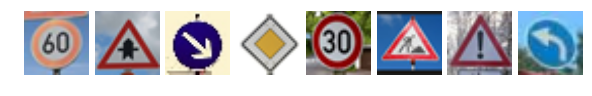

In [25]:
### download some pictures from internet into the folder named my_traffic_signs
import glob
import matplotlib.image as mpimg

fig,axs = plt.subplots(1,8,figsize=(10,10))
fig.subplots_adjust(hspace=0.002,wspace=.1)
axs = axs.ravel()

my_images = []

for i,img in enumerate(glob.glob('./my_traffic_signs/*x.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    my_images.append(image)
my_images = np.asarray(my_images)
print(my_images.shape)


### Predict the Sign Type for Each Image

In [26]:

# Preprocess the images with the same pipeline, pre_test_gray(color space change)->pre_test_value(normalization)
pre_test_images_final = preprocess_value(preprocess_gray(my_images))

test_labels = [3, 11, 38, 12, 1, 25, 18, 34]
#[25, 3, 12, 1, 11, 18, 34, 38]#

with tf.Session(config=config) as sess:
    #sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess,'./lenet')
    #accuracy_operation = tf.get_collection('accuracy_op')
    test_accuracy = evaluate(pre_test_images_final,test_labels)
    print('Test Dataset Accuracy = {:.4f}'.format(test_accuracy))
    
    

INFO:tensorflow:Restoring parameters from ./lenet
Test Dataset Accuracy = 1.0000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


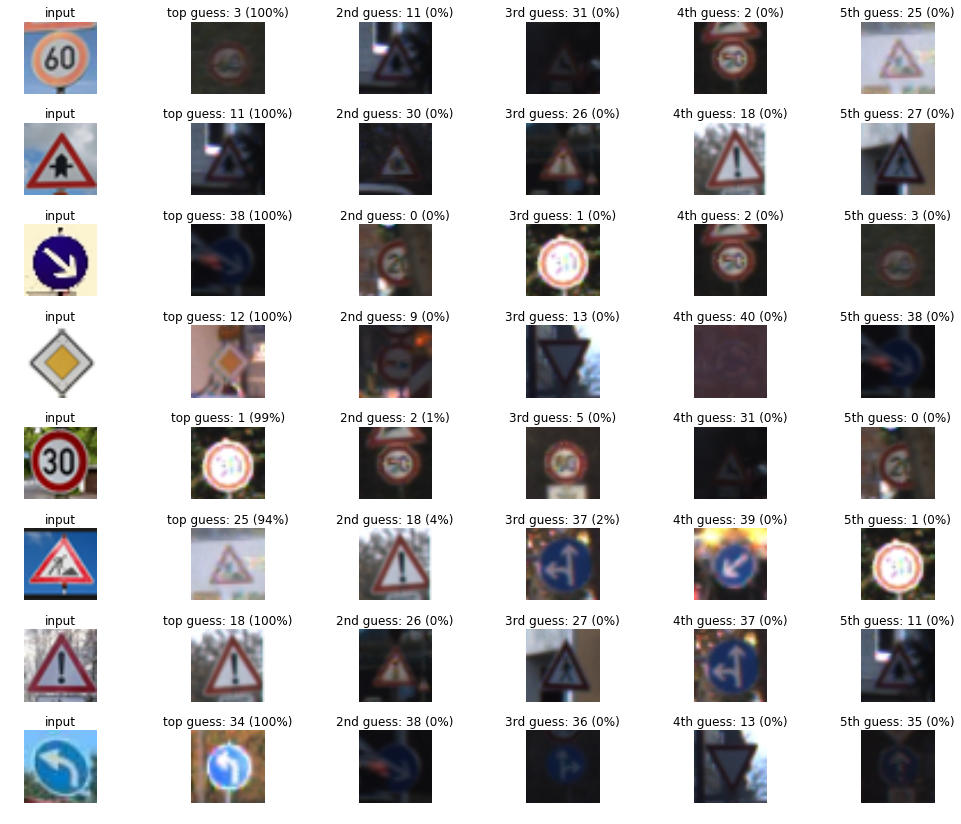

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits,k=5)

with tf.Session(config=config) as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess,'./lenet')
    my_softmax_logits = sess.run(softmax_logits,feed_dict={x:pre_test_images_final,keep_prob:1.0})
    my_top_k = sess.run(top_k,feed_dict={x:pre_test_images_final,keep_prob:1.0})
    
    fig,axs = plt.subplots(len(my_images),6,figsize=(18,14))
    fig.subplots_adjust(hspace= .4, wspace=.002)
    
    axs = axs.ravel()
    
    for i, image in enumerate(my_images):
        axs[6*i].axis('off')
        axs[6*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[6*i].set_title('input')
        
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_valid[index4].squeeze(),cmap='gray')
        axs[6*i+4].set_title('4th guess: {} ({:.0f}%)'.format(guess4,100*my_top_k[0][i][3]))
        
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_valid[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('5th guess: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][4]))
        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.